# 🔐 نظام تصنيف البلاغات الأمنية باستخدام تعلم الآلة

## 📌 نظرة عامة على المشروع

هذا المشروع يهدف إلى بناء نموذج تعلم آلة متقدم يصنف البلاغات الأمنية حسب درجة الأولوية:
- **عادي (Normal):** لا يحتاج استجابة فورية
- **عاجل (Urgent):** يحتاج استجابة سريعة خلال ساعات
- **طارئ (Critical):** يحتاج استجابة فورية

## 🎯 الأهداف
1. تحميل ومعالجة البيانات الأمنية
2. تنظيف البيانات وإزالة الشوائب
3. استخراج السمات المهمة (Feature Engineering)
4. بناء نماذج تصنيف متعددة
5. مقارنة الأداء واختيار أفضل نموذج
6. اختبار النموذج على بيانات جديدة



## 📚 المكتبات المستخدمة
- `pandas`: معالجة البيانات
- `numpy`: العمليات الرياضية
- `scikit-learn`: خوارزميات تعلم الآلة
- `matplotlib` و `seaborn`: التصور البياني
- `scipy`: العمليات الإحصائية

## بيانات المشروع
| الخوارزمية | لماذا تختارها؟ |
| :--- | :--- |
| **report_type** |يحتوي هذا العمود على انواع البلاغات الامنيه ك بلاغات سرق-قتل-عنف-وغيرها|
| **report_status** | هذا العمود يمثل حالة البلاغ هل هو مفتوح بمعنى هل هو جديد تم ام مغلق بمعنى قد تم اغلاق ملف البلاغ ام قيد التحقيق |
| **report_category** | هذا يمثل الاولوية بمعنى هل البلاغ الذي تم ادخاللة يحتاج معالجه سريع او طارى |
| **report_time** | هذه يعبر عن وقت خدوث البلاغ او الحادثة |
| **injuries** |هذا يعبر عن ما اذا كان هناك اصابات ام لا الناتج عن هذا البلاغ او الحادثه|
| **weapon_involved** |هذا يعبر عما اذا تم استخدام سلاح في هذه الحادثه ام لا |
| **num_suspects** |هذا يعبرعن عدد الاشخاص المشتبهه بهم ا |

---
### العلاقة بين هذه البيانات وكيف توثر على المخرجات 
اذا كان نوع البلاغ قتل وكانت ابلاغ مفتوحا اي انه جديد وكانت هناك استخدام اسلحة او اصابات فانه سيتم تصنيفه ك عاجل
اما في حال كانت حاله البلاغ مغقة اي انه قد تم اغلاق الملف فلن يتم تصنيف البلاغ ك طاري لانه في لاساس قد تم اغلاق الملف

## 📌 استيراد المكاتب

In [16]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1-مرحل جميع البيانات وعرضها
في هذه المرحلة يتم قراءه ملف الاكسل للمشروع وعرضة

In [38]:
# قراءة ملف JSON
file_path = 'cleaned_reports_v2.csv'
data = pd.read_csv(file_path)
data
print(f'📊 عدد البلاغات: {len(data)}')
print(f'📋 الأعمدة: {list(data.columns)}')

#df.to_csv("reports",index=False)

📊 عدد البلاغات: 1000
📋 الأعمدة: ['id', 'report_category', 'report_type', 'report_status', 'location', 'report_date', 'report_time', 'report_description', 'injuries', 'weapon_involved', 'num_suspects']


 معلومات

In [34]:

print(f'\n📈 معلومات البيانات:')
print(data.info())
data.describe()
data.isnull().sum()
data.isna().sum()



📈 معلومات البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1000 non-null   int64 
 1   report_category     1000 non-null   object
 2   report_type         1000 non-null   object
 3   report_status       1000 non-null   object
 4   location            1000 non-null   object
 5   report_date         1000 non-null   object
 6   report_time         1000 non-null   object
 7   report_description  1000 non-null   object
 8   injuries            1000 non-null   bool  
 9   weapon_involved     1000 non-null   bool  
 10  num_suspects        1000 non-null   int64 
dtypes: bool(2), int64(2), object(7)
memory usage: 72.4+ KB
None


id                    0
report_category       0
report_type           0
report_status         0
location              0
report_date           0
report_time           0
report_description    0
injuries              0
weapon_involved       0
num_suspects          0
dtype: int64

## 3. تحليل التوزيع

In [39]:
# توزيع التصنيفات
print('📊 توزيع الفئات:')
print(data['report_category'].value_counts())
print(f'\n📊 توزيع أنواع البلاغات:')
print(data['report_type'].value_counts())

📊 توزيع الفئات:
report_category
عادي    668
طارئ    197
عاجل    135
Name: count, dtype: int64

📊 توزيع أنواع البلاغات:
report_type
حريق            92
سرقة            84
اختطاف          61
إطلاق نار       60
حادث سير        58
عنف منزلي       57
مفقود           57
سرقة مسلحة      55
تهديد           54
تهريب مخدرات    54
اعتداء          50
تزوير           49
شجار            47
سرقة سيارة      46
غرق             45
تخريب           44
احتيال          44
اعتداء جنسي     43
Name: count, dtype: int64


## 4. معالجة البيانات (Feature Engineering)

In [42]:
# نسخ البيانات
df = data.copy()

# استخراج الساعة من report_time
df['hour'] = pd.to_datetime(df['report_time']).dt.hour
df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 6)).astype(int)

# تحويل القيم المنطقية إلى أرقام
df['injuries'] = df['injuries'].astype(int)
df['weapon_involved'] = df['weapon_involved'].astype(int)

# ترميز النصوص
le_type = LabelEncoder()
le_status = LabelEncoder()
le_location = LabelEncoder()

df['report_type_encoded'] = le_type.fit_transform(df['report_type'])
df['report_status_encoded'] = le_status.fit_transform(df['report_status'])
df['location_encoded'] = le_location.fit_transform(df['location'])

# اختيار السمات (Features)
features = ['report_type_encoded', 'report_status_encoded', 'location_encoded', 
            'injuries', 'weapon_involved', 'num_suspects', 'is_night']

X = df[features]
y = df['report_category']

print('✅ تم معالجة البيانات بنجاح')
print(f'📊 عدد السمات: {len(features)}')
print(f'📊 عدد العينات: {len(X)}')

✅ تم معالجة البيانات بنجاح
📊 عدد السمات: 7
📊 عدد العينات: 1000


## 5. تقسيم البيانات

In [43]:
# تقسيم البيانات: 80% للتدريب، 20% للاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'📊 عدد عينات التدريب: {len(X_train)}')
print(f'📊 عدد عينات الاختبار: {len(X_test)}')
print(f'\n📊 توزيع الفئات في بيانات التدريب:')
print(y_train.value_counts())

📊 عدد عينات التدريب: 800
📊 عدد عينات الاختبار: 200

📊 توزيع الفئات في بيانات التدريب:
report_category
عادي    534
طارئ    158
عاجل    108
Name: count, dtype: int64


## 6. تدريب نموذج الغابة العشوائية (Random Forest)

In [48]:
# تدريب نموذج الغابة العشوائية
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# التنبؤ
y_pred_rf = rf_model.predict(X_test)

# حساب الدقة
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print('🌲 نموذج الغابة العشوائية (Random Forest)')
print(f'✅ الدقة: {rf_accuracy:.4f}')
print(f'✅ F1-Score: {rf_f1:.4f}')
print(f'\n📊 تقرير التصنيف:')
print(classification_report(y_test, y_pred_rf, digits=4))

🌲 نموذج الغابة العشوائية (Random Forest)
✅ الدقة: 0.8900
✅ F1-Score: 0.8842

📊 تقرير التصنيف:
              precision    recall  f1-score   support

        طارئ     0.8788    0.7436    0.8056        39
        عاجل     0.8500    0.6296    0.7234        27
        عادي     0.8980    0.9851    0.9395       134

    accuracy                         0.8900       200
   macro avg     0.8756    0.7861    0.8228       200
weighted avg     0.8877    0.8900    0.8842       200



## 7. تدريب نموذج KNN (K-Nearest Neighbors)

In [49]:
# تدريب نموذج KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# التنبؤ
y_pred_knn = knn_model.predict(X_test)

# حساب الدقة
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print('🔍 نموذج KNN (K-Nearest Neighbors)')
print(f'✅ الدقة: {knn_accuracy:.4f}')
print(f'✅ F1-Score: {knn_f1:.4f}')
print(f'\n📊 تقرير التصنيف:')
print(classification_report(y_test, y_pred_knn, digits=4))

🔍 نموذج KNN (K-Nearest Neighbors)
✅ الدقة: 0.6400
✅ F1-Score: 0.6262

📊 تقرير التصنيف:
              precision    recall  f1-score   support

        طارئ     0.3333    0.2821    0.3056        39
        عاجل     0.3810    0.2963    0.3333        27
        عادي     0.7466    0.8134    0.7786       134

    accuracy                         0.6400       200
   macro avg     0.4870    0.4639    0.4725       200
weighted avg     0.6166    0.6400    0.6262       200



## 8. مقارنة النماذج

In [50]:
# مقارنة النماذج
comparison = pd.DataFrame({
    'النموذج': ['الغابة العشوائية', 'KNN'],
    'الدقة': [rf_accuracy, knn_accuracy],
    'F1-Score': [rf_f1, knn_f1]
})

print('📊 مقارنة النماذج:')
print(comparison.to_string(index=False))

# تحديد أفضل نموذج
best_model = 'الغابة العشوائية' if rf_accuracy > knn_accuracy else 'KNN'
print(f'\n🏆 أفضل نموذج: {best_model}')

📊 مقارنة النماذج:
         النموذج  الدقة  F1-Score
الغابة العشوائية   0.89  0.884209
             KNN   0.64  0.626226

🏆 أفضل نموذج: الغابة العشوائية


## 9. مصفوفة الالتباس (Confusion Matrix)

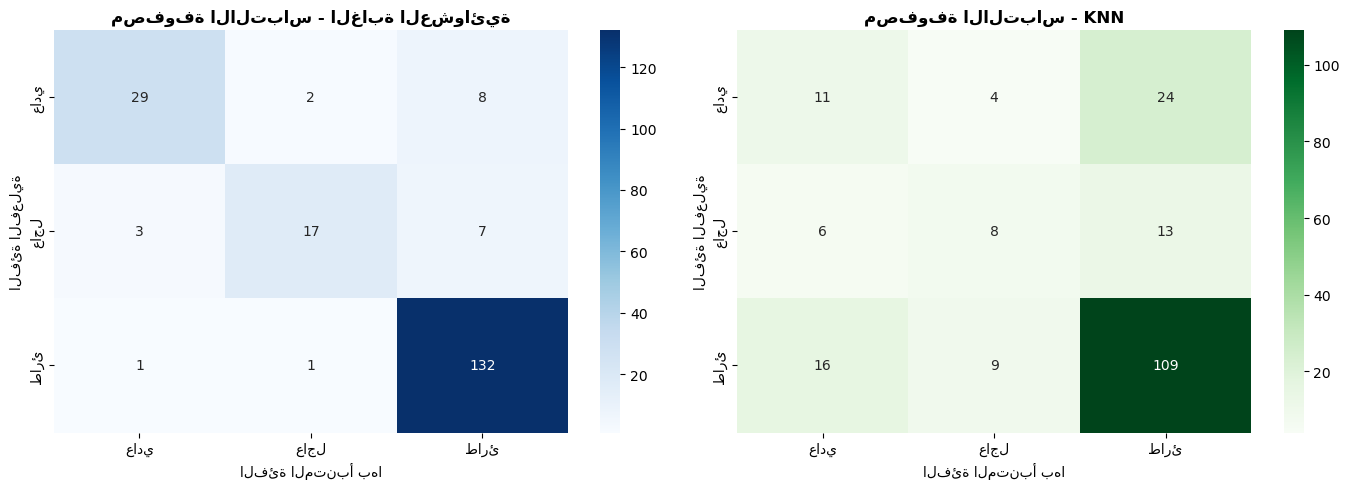

✅ تم رسم مصفوفات الالتباس


In [51]:
# حساب مصفوفة الالتباس
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# رسم مصفوفة الالتباس
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# الغابة العشوائية
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['عادي', 'عاجل', 'طارئ'],
            yticklabels=['عادي', 'عاجل', 'طارئ'])
axes[0].set_title('مصفوفة الالتباس - الغابة العشوائية', fontsize=12, fontweight='bold')
axes[0].set_ylabel('الفئة الفعلية')
axes[0].set_xlabel('الفئة المتنبأ بها')

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['عادي', 'عاجل', 'طارئ'],
            yticklabels=['عادي', 'عاجل', 'طارئ'])
axes[1].set_title('مصفوفة الالتباس - KNN', fontsize=12, fontweight='bold')
axes[1].set_ylabel('الفئة الفعلية')
axes[1].set_xlabel('الفئة المتنبأ بها')

plt.tight_layout()
plt.show()

print('✅ تم رسم مصفوفات الالتباس')

## 10. أهمية السمات (Feature Importance)

📊 أهمية السمات:
                السمة  الأهمية
  report_type_encoded 0.338147
report_status_encoded 0.319483
     location_encoded 0.161405
         num_suspects 0.086621
             is_night 0.032374
      weapon_involved 0.031863
             injuries 0.030108


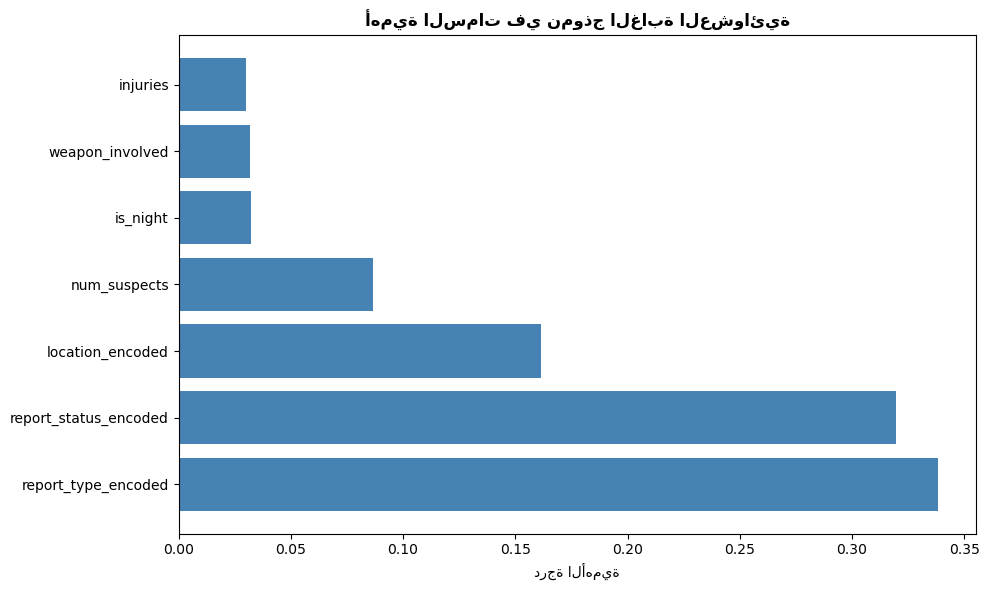

In [52]:
# الحصول على أهمية السمات من الغابة العشوائية
feature_importance = pd.DataFrame({
    'السمة': features,
    'الأهمية': rf_model.feature_importances_
}).sort_values('الأهمية', ascending=False)

print('📊 أهمية السمات:')
print(feature_importance.to_string(index=False))

# رسم أهمية السمات
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['السمة'], feature_importance['الأهمية'], color='steelblue')
plt.xlabel('درجة الأهمية')
plt.title('أهمية السمات في نموذج الغابة العشوائية', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## 11. اختبار التنبؤ على بلاغ جديد

In [54]:
# مثال على بلاغ جديد
new_report = pd.DataFrame({
    'report_type_encoded': [le_type.transform(['سرقة'])[0]],
    'report_status_encoded': [le_status.transform(['مفتوح'])[0]],
    'location_encoded': [le_location.transform(['الرياض'])[0]],
    'injuries': [1],  # نعم
    'weapon_involved': [1],  # نعم
    'num_suspects': [2],
    'is_night': [1],  # ليل
})

# التنبؤ باستخدام الغابة العشوائية
prediction_rf = rf_model.predict(new_report)[0]
probability_rf = rf_model.predict_proba(new_report)[0]

# التنبؤ باستخدام KNN
prediction_knn = knn_model.predict(new_report)[0]
probability_knn = knn_model.predict_proba(new_report)[0]

print('🔮 التنبؤ على بلاغ جديد:')
print(f'البلاغ: سرقة مسلحة في الرياض، مع إصابات، في الليل')
print(f'\n🌲 نموذج الغابة العشوائية:')
print(f'   التصنيف: {prediction_rf}')
print(f'   الاحتماليات: عادي={probability_rf[0]:.2%}, عاجل={probability_rf[1]:.2%}, طارئ={probability_rf[2]:.2%}')
print(f'\n🔍 نموذج KNN:')
print(f'   التصنيف: {prediction_knn}')
print(f'   الاحتماليات: عادي={probability_knn[0]:.2%}, عاجل={probability_knn[1]:.2%}, طارئ={probability_knn[2]:.2%}')

🔮 التنبؤ على بلاغ جديد:
البلاغ: سرقة مسلحة في الرياض، مع إصابات، في الليل

🌲 نموذج الغابة العشوائية:
   التصنيف: عاجل
   الاحتماليات: عادي=7.00%, عاجل=47.00%, طارئ=46.00%

🔍 نموذج KNN:
   التصنيف: عادي
   الاحتماليات: عادي=0.00%, عاجل=0.00%, طارئ=100.00%


## 12. الملخص والنتائج

In [55]:
print('='*60)
print('📊 ملخص النتائج')
print('='*60)
print(f'\n📈 عدد البلاغات المستخدمة: {len(data)}')
print(f'📈 عدد السمات: {len(features)}')
print(f'📈 نسبة التدريب/الاختبار: 80/20')
print(f'\n🌲 نموذج الغابة العشوائية:')
print(f'   - الدقة: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)')
print(f'   - F1-Score: {rf_f1:.4f}')
print(f'\n🔍 نموذج KNN:')
print(f'   - الدقة: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)')
print(f'   - F1-Score: {knn_f1:.4f}')
print(f'\n🏆 أفضل نموذج: {best_model}')
print(f'\n✅ تم بناء النماذج بنجاح!')
print('='*60)

📊 ملخص النتائج

📈 عدد البلاغات المستخدمة: 1000
📈 عدد السمات: 7
📈 نسبة التدريب/الاختبار: 80/20

🌲 نموذج الغابة العشوائية:
   - الدقة: 0.8900 (89.00%)
   - F1-Score: 0.8842

🔍 نموذج KNN:
   - الدقة: 0.6400 (64.00%)
   - F1-Score: 0.6262

🏆 أفضل نموذج: الغابة العشوائية

✅ تم بناء النماذج بنجاح!
